# **Importing data**





In [529]:
import numpy as np
import pandas as pd




In [530]:
sms=pd.read_csv("spam.csv",encoding="latin-1")
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [531]:
sms=sms.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
sms=sms.rename(columns={"v1":"Label","v2":"Text"})
sms["Length"]=sms["Text"].apply(len)
sms.head()

,Label,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61




# **Deleting duplicates**

In [532]:
sms.duplicated().sum()



403

In [533]:
duplicatedRow = sms[sms.duplicated()]
print(duplicatedRow[:])


     Label                                               Text  Length
102    ham  As per your request 'Melle Melle (Oru Minnamin...     160
153    ham  As per your request 'Melle Melle (Oru Minnamin...     160
206    ham  As I entered my cabin my PA said, '' Happy B'd...     156
222    ham                             Sorry, I'll call later      22
325    ham                   No calls..messages..missed calls      32
...    ...                                                ...     ...
5524  spam  You are awarded a SiPix Digital Camera! call 0...     153
5535   ham  I know you are thinkin malaria. But relax, chi...     329
5539   ham                         Just sleeping..and surfing      26
5553   ham                        Hahaha..use your brain dear      27
5558   ham                             Sorry, I'll call later      22

[403 rows x 3 columns]


In [534]:
sms= sms.drop_duplicates()


# Exploring dataset

In [535]:
sms.shape

(5169, 3)

In [536]:
sms.columns

Index(['Label', 'Text', 'Length'], dtype='object')

In [537]:
print("Number of rows:",len(sms))

Number of rows: 5169


In [538]:
sms.isnull().sum()

Label     0
Text      0
Length    0
dtype: int64

In [539]:
sms.Label.value_counts()

ham     4516
spam     653
Name: Label, dtype: int64

# 0->**Not spam**
#1->**Spam**




In [540]:
sms.loc[:,"Label"]=sms.Label.map({"ham":0,"spam":1})
sms.head()

<ipython-input-540-263b531f7795>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sms.loc[:,"Label"]=sms.Label.map({"ham":0,"spam":1})


,Label,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# **Plot**

In [541]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

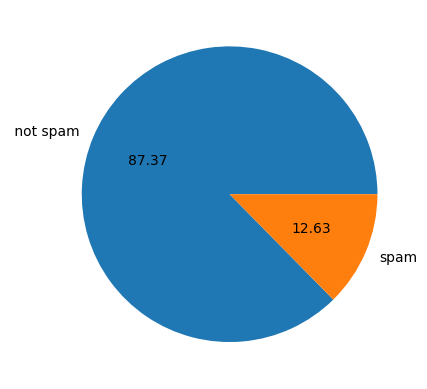

In [542]:
plt.pie(sms['Label'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

<Axes: xlabel='Length', ylabel='Count'>

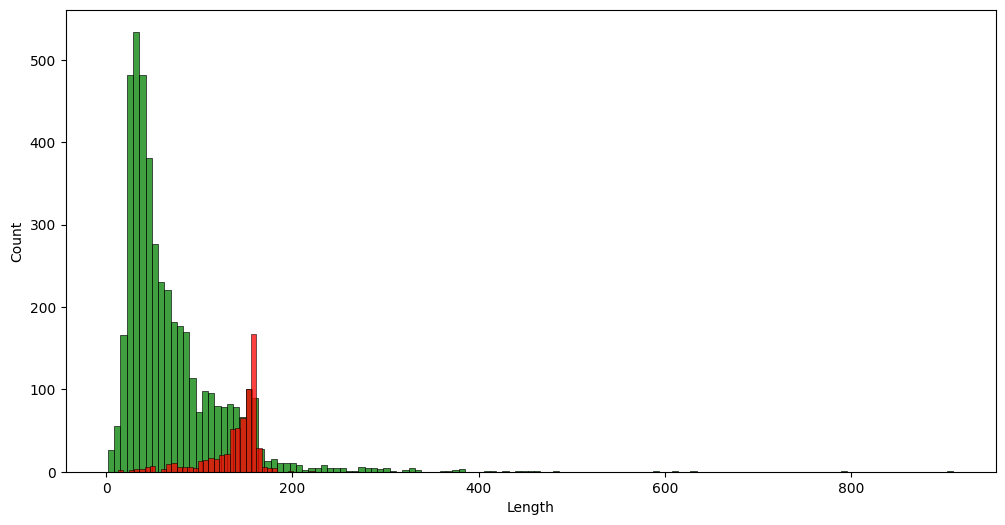

In [543]:
plt.figure(figsize=(12,6))
sns.histplot(sms['Length'][sms['Label']==0],color='green')
sns.histplot(sms['Length'][sms['Label']==1],color = 'red')

In [544]:
# Get all the ham and spam emails
ham_msg = sms[sms.Label ==0]
spam_msg = sms[sms.Label==1]
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.Text.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.Text.to_numpy().tolist())

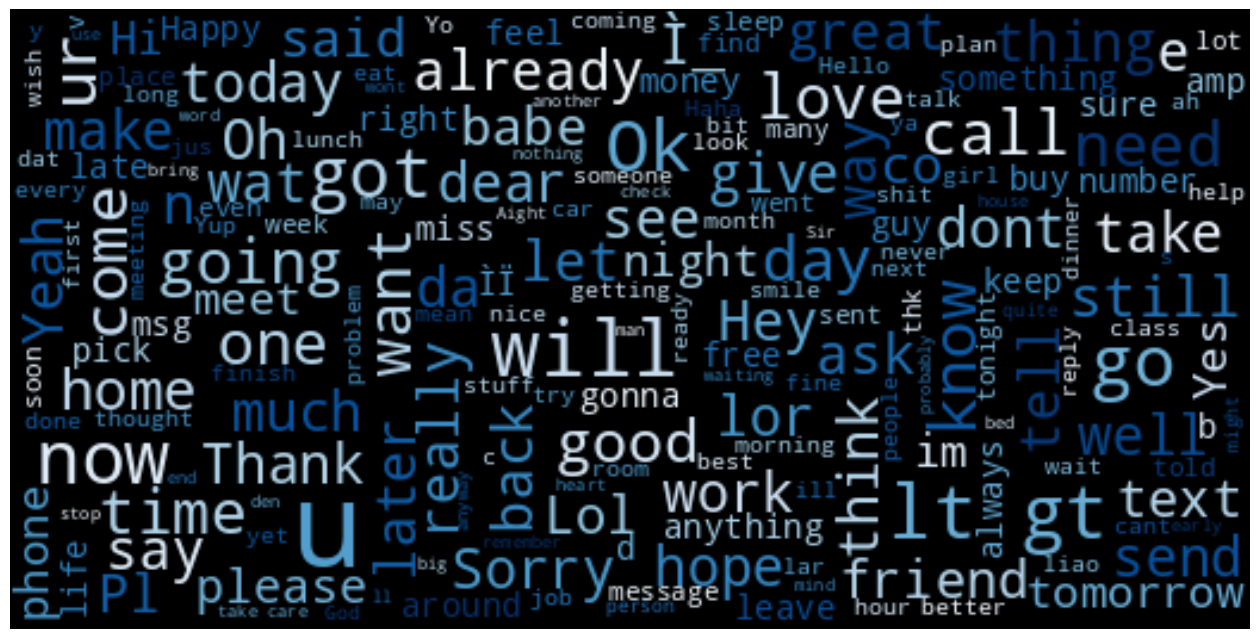

In [545]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

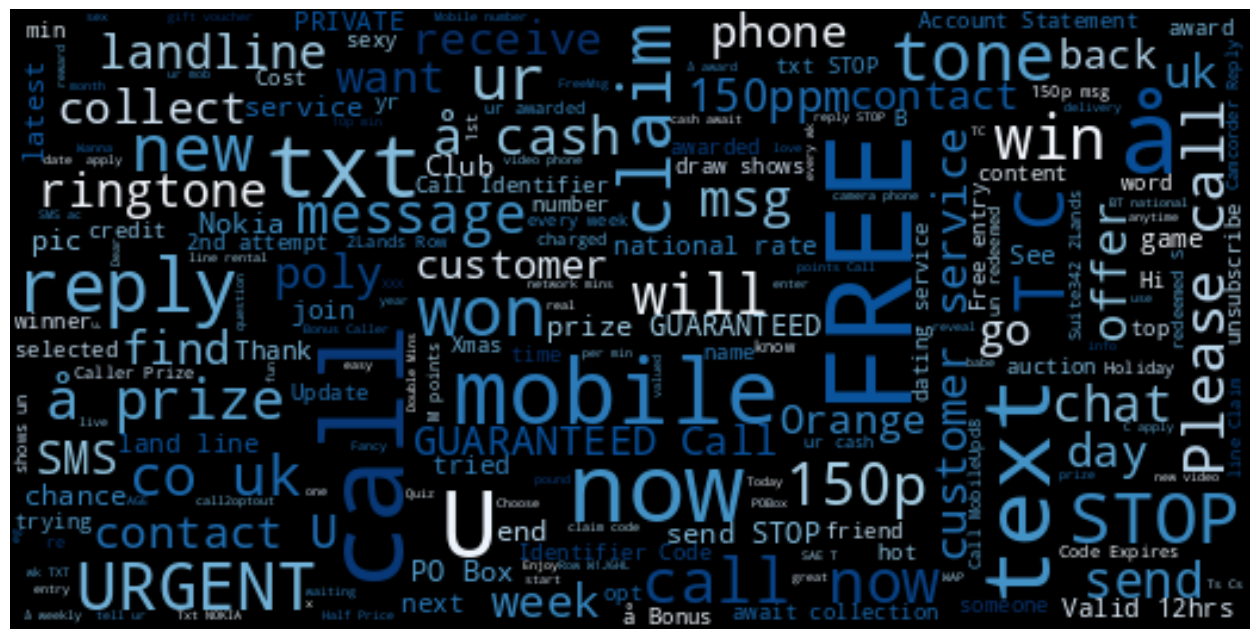

In [546]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()


# **Implementing Classification**

In [547]:
sms.head()

,Label,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [548]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test =train_test_split(sms["Text"],sms["Label"],test_size=0.30)

In [549]:
x_train

2257              Here got lots of hair dresser fr china.
4392    RECPT 1/3. You have ordered a Ringtone. Your o...
2693    All these nice new shirts and the only thing I...
3156            Havent shopping now lor i juz arrive only
578     our mobile number has won å£5000, to claim cal...
                              ...                        
4837    All boys made fun of me today. Ok i have no pr...
3972                        Night night, see you tomorrow
3665    I'm turning off my phone. My moms telling ever...
3262                              So u gonna get deus ex?
2277    Hello! How r u? Im bored. Inever thought id ge...
Name: Text, Length: 3618, dtype: object

In [550]:
## Using CountVectorizer to Extracting Features from Text


from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(lowercase=True,stop_words='english')


In [551]:
x_train_transformed=cv.fit_transform(x_train)
x_test_transformed=cv.transform(x_test)

In [552]:
x_train_transformed

<3618x6740 sparse matrix of type '<class 'numpy.int64'>'
	with 27668 stored elements in Compressed Sparse Row format>

In [553]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [554]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [555]:
gnb.fit(x_train_transformed.toarray(),y_train)
y_pred1=gnb.predict(x_test_transformed.toarray())
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Gaussian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))



Accuracy score of Gaussian NB is:  0.8929722759509994
Confusion Matrix of Gaussian NB is:  [[1205  144]
 [  22  180]]
Precision score of the Gaussian NB is 0.5555555555555556


In [556]:
mnb.fit(x_train_transformed.toarray(),y_train)
y_pred2=mnb.predict(x_test_transformed.toarray())
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

Accuracy score of Multinomial NB is:  0.9858156028368794
Confusion Matrix of Multinomial NB is:  [[1341    8]
 [  14  188]]
Precision score of the Multinomial NB is 0.9591836734693877


In [557]:
bnb.fit(x_train_transformed,y_train)
y_pred3=bnb.predict(x_test_transformed.toarray())
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

Accuracy score of Bernoulli NB is:  0.970341715022566
Confusion Matrix of Bernoulli NB is:  [[1349    0]
 [  46  156]]
Precision score of the Bernoulli NB is 1.0


# **Building Predictive system**

In [558]:
input="""

Hi how are you


"""

input_transformed=(cv.transform([input]))
prediction=mnb.predict(input_transformed)
print(prediction)

if (prediction[0]== 0):
  print('It is not a spam message')
else:
  print('It is a spam message')

[0]
It is not a spam message
